In [1]:
import pandas as pd
import numpy as np
import os
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t0 = time()
def print_time(time_value):
    t1 = time()
    total_minutes = round((t1- t0)/60, 4)
    print('Total Minutes: ', total_minutes)


In [3]:
%%time
dir_base = ''
dir_next = ''
file_name = 'data_daily_sunspot_count_20180101_20250131'
file_format = '.txt'
input_path = dir_base+dir_next+file_name+file_format
file_opened = open(input_path, "r")

list_columns = ['YEAR', 'MONTH', 'DAY', 'DATE_FRACTION', 'DAILY_SUNSPOT_NUMBER', 'DAILY_SD_STATIONS', 'NUMBER_OBSERRVATIONS', 'INDICATOR_PROVISIONAL']
df = pd.DataFrame([], columns=list_columns)
print_times = True
counter = 0
t0 = time()
for data_row in file_opened.readlines():
    row_split = data_row.split()
    if len(row_split)==7:
        row_split = row_split + ['NULL']
    ser_row = pd.DataFrame(row_split).T
    ser_row.columns = list_columns
    df = pd.concat([df, ser_row], axis=0)
    if print_times:
        counter +=1
        if counter % 10000 == 0:   
            print('Number of Rows: ', counter)
            print_time(t0)
print('....finished')
print('Shape: ', df.shape)
df.head()

Number of Rows:  10000
Total Minutes:  0.0763
Number of Rows:  20000
Total Minutes:  0.2453
Number of Rows:  30000
Total Minutes:  0.567
Number of Rows:  40000
Total Minutes:  1.0694
Number of Rows:  50000
Total Minutes:  1.7804
Number of Rows:  60000
Total Minutes:  2.7151
Number of Rows:  70000
Total Minutes:  3.9361
....finished
Shape:  (75637, 8)
CPU times: user 4min 11s, sys: 30.4 s, total: 4min 42s
Wall time: 4min 42s


,YEAR,MONTH,DAY,DATE_FRACTION,DAILY_SUNSPOT_NUMBER,DAILY_SD_STATIONS,NUMBER_OBSERRVATIONS,INDICATOR_PROVISIONAL
0,1818,1,01,1818.001,-1,-1.0,0,NULL
0,1818,1,02,1818.004,-1,-1.0,0,NULL
0,1818,1,03,1818.007,-1,-1.0,0,NULL
0,1818,1,04,1818.010,-1,-1.0,0,NULL
0,1818,1,05,1818.012,-1,-1.0,0,NULL


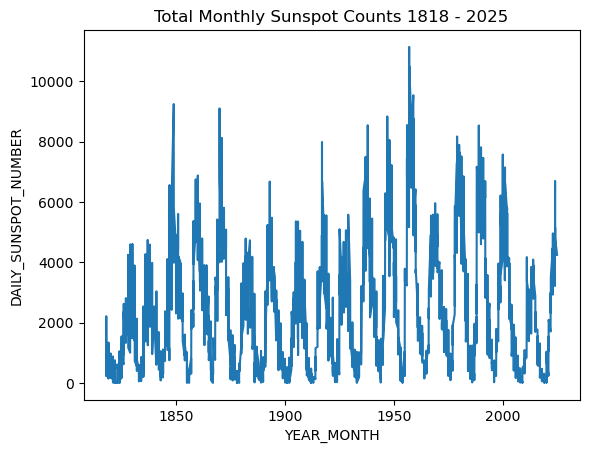

In [4]:
### clean data

df['YEAR'] = df['YEAR'].astype(int)
df['MONTH'] = df['MONTH'].astype(int)
df['DAY'] = df['DAY'].astype(int)
df['DAILY_SUNSPOT_NUMBER'] = df['DAILY_SUNSPOT_NUMBER'].astype(int)
df['NUMBER_OBSERRVATIONS'] = df['NUMBER_OBSERRVATIONS'].astype(int)

df['DAILY_SUNSPOT_NUMBER'] = df['DAILY_SUNSPOT_NUMBER'].astype(int)
df['DAILY_SUNSPOT_NUMBER'] = df['DAILY_SUNSPOT_NUMBER'].replace(-1, 0)

### add some padding to the zeros to concatenate the month and day
def add_str_padding(int_input):
    str_out = None
    if len(str(int_input)) >1 :
        str_out = str(int_input)
    else:
        str_out = '0'+str(int_input)
    return str_out

df['MONTH_STR'] = df['MONTH'].apply(lambda x: add_str_padding(x))
df['YEAR_MONTH'] = df['YEAR'].astype(str) + df['MONTH_STR'].astype(str)
df['YEAR_MONTH'] = df['YEAR_MONTH'].astype(int)/100
df_pivot = pd.pivot_table(
    df,
    values='DAILY_SUNSPOT_NUMBER',      # Column to aggregate
    index='YEAR_MONTH',        # Rows of the pivot table
    columns=None,  # Columns of the pivot table
    aggfunc='sum'        # Aggregation function (you can use 'mean', 'count', etc.)
)
df_pivot = df_pivot.reset_index()

sns.lineplot(data=df_pivot, x='YEAR_MONTH', y='DAILY_SUNSPOT_NUMBER')
plt.title('Total Monthly Sunspot Counts 1818 - 2025') 
plt.show()

In [ ]:



sns.lineplot(df, x='DATE_FRACTION', y='DAILY_SUNSPOT_NUMBER')

### Export Data

In [ ]:
def create_file_path(dir_base, dir_next):
    if not os.path.exists(dir_base+dir_next):
        os.mkdir(dir_base+dir_next)
        print('Path Created: ', dir_base+dir_next)

def create_file_input(dir_base, dir_next, file_name, file_type):
    str_out = dir_base+dir_next+file_name+file_type
    return str_out

In [ ]:
dir_base = 'report_sunspots/'
dir_next = 'value_counts/'
create_file_path(dir_base, dir_next)

In [ ]:
for column in df.columns:
    print('\n')
    # print('Column: ', column)
    file_name = 'value_counts_{}'.format(column)
    file_format = '.csv'
    path_input = create_file_input(dir_base, dir_next, file_name, file_format)
    df[column].value_counts().to_csv(path_input)

In [ ]:
print(path_input)

In [ ]:
%%time
### Declare Variables
time0 = time()
counter = 1
S = 2000
M = (2, 1000)
bool_print_times = True
dic_harmonic_outputs = {}
for k in range(M[0], M[1]+1):
    dic_harmonic_outputs[k] = []
    for n in range(1, S+1):
        ss = harmonicK(K=k, N=n)
        dic_harmonic_outputs[k].append(ss)
    if counter % 100 == 0:
        print_times(incounter=counter, mod_value = 100, intime=time0)
        counter += 1
print_times(incounter=counter, mod_value = 100, intime=time0)
df_harmonic_multiples = pd.DataFrame(dic_harmonic_outputs)
ax = plt.axes()
# plt.legend(loc="upper left")
# ax.set_facecolor('blue')
ax.set_facecolor((1., 0.8, 0.42))
ax.plot(df_harmonic_multiples, c= 'black')
ax.plot(np.arange(1, S), np.log(np.arange(1,S)+2), c='red')
ax.set_xlim([1025, 1030])
ax.set_ylim([7.4, 8])
plt.show()